#Breast Cancer Image Classification using CNN
Breast cancer forms in breast cells and is considered as a very common type of cancer in women. Breast cancer is also a very life-threatening disease of women after lung cancer. A convolutional neural network (CNN) method is proposed in this study to boost the automatic identification of breast cancer.
With the progress of CNN technology, lots of researchers use CNN to diagnose breast cancer. A large number of studies have proved that CNN shows superior performance in breast cancer diagnosis. CNN can be a solution for the continuous improvement of image analysis technology and transfer learning

#Dataset
Dataset contains 3 classes benign, malignant and normal.
*   Benign class contain 437 images.
*   Malignant class contain 210 images.
*   Normal class contain 130 images.



#Data Loading

In [1]:
'''Mounting google drive for data loading'''
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
'''Unzipping Data'''
!unzip gdrive/My\ Drive/Ultrasound.zip > /dev/null

In [3]:
data_path='/content/Dataset_BUSI_with_GT'

#Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [5]:
'''Analyzing image shape'''
img=cv2.imread('/content/Dataset_BUSI_with_GT/benign/benign (1).png')
print(img.shape)

(471, 562, 3)


#Data Augmentation
It is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.


In [6]:
datagen=ImageDataGenerator(rescale=1.0/255,
                           rotation_range=20,
                           validation_split=0.2)

In [7]:
'''Class mode is categorical in data generation because of multiclass dataset'''
training_data=datagen.flow_from_directory(directory=data_path,
                                          target_size=(256,256),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training')

Found 1263 images belonging to 3 classes.


In [8]:
validation_data=datagen.flow_from_directory(directory=data_path,
                                            target_size=(256,256),
                                            batch_size=4,
                                            class_mode='categorical',
                                            subset='validation')

Found 315 images belonging to 3 classes.


In [9]:
training_data.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [10]:
classes=list(training_data.class_indices.keys())
num_classes=len(classes)

In [11]:
print(num_classes)

3


#Data Visualization

In [12]:
'''Function for plotting images'''
def plotImages(img_arr):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for im,ax in zip(img_arr,axes):
    ax.imshow(im)
  plt.tight_layout()
  plt.show()

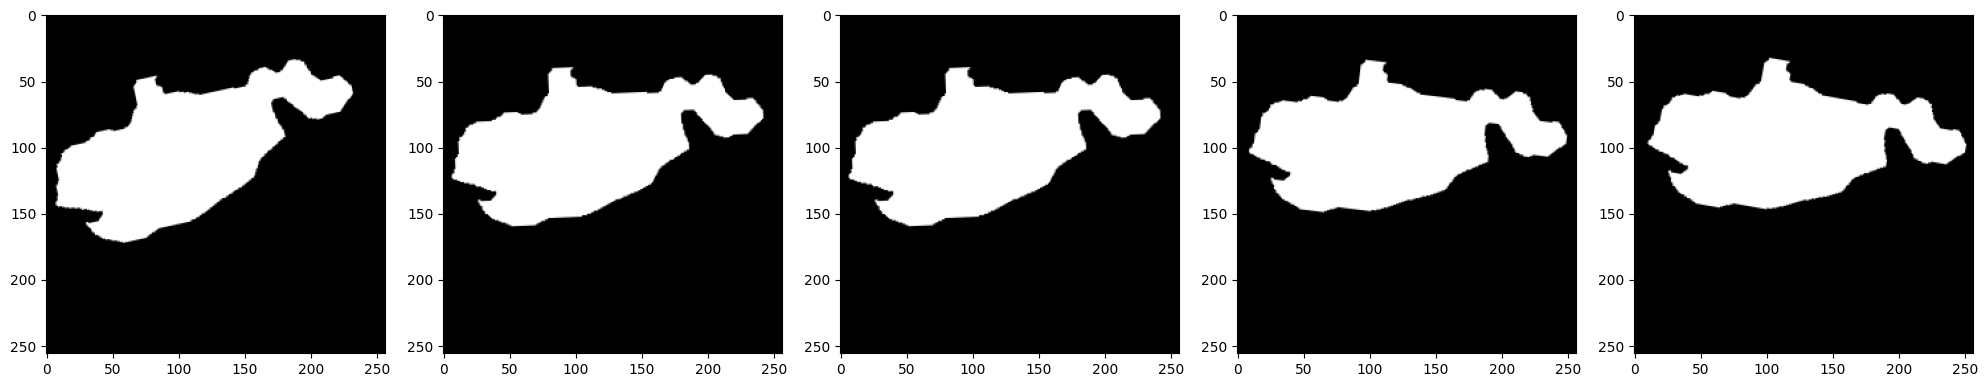

In [13]:
images=[training_data[0][0][0] for i in range(5)]
plotImages(images)

#Model Building
Sequential Model − Sequential model is basically a linear composition of Keras Layers. Sequential model is easy, minimal as well as has the ability to represent nearly all available neural networks.

In [14]:
model=Sequential()

In this model a convolution layer is added taking input shape of image 256,256,3. We add 2 convoltion layer and 2 maxpooling layer. Then after flattening use 3 dense layer.

In [15]:
model.add(Conv2D(input_shape=(256,256,3),
                 filters=64,
                 kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=num_classes,activation='softmax'))

In [16]:
'''Analyzing Model'''
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 492032)            0         
                                                                 
 dense (Dense)               (None, 512)               2

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters". Categorical crossentropy loss function is used for two or more classes.

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Early Stopping
EarlyStopping is a callback used while training neural networks, which provides us the advantage of using a large number of training epochs and stopping the training once the model's performance stops improving on the validation Dataset.

In [18]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                          mode='min',
                                          patience=5)

In [21]:
''' Fitting the model'''
history=model.fit(training_data,
          validation_data=validation_data,
          batch_size=8,
          epochs=10,
          verbose=1)

Epoch 1/10
40/40 [==============================] - 34s 831ms/step - loss: 0.3989 - accuracy: 0.8393 - val_loss: 0.7069 - val_accuracy: 0.7048
Epoch 2/10
40/40 [==============================] - 33s 822ms/step - loss: 0.3548 - accuracy: 0.8575 - val_loss: 0.8572 - val_accuracy: 0.7302
Epoch 3/10
40/40 [==============================] - 33s 834ms/step - loss: 0.2868 - accuracy: 0.8955 - val_loss: 0.8425 - val_accuracy: 0.7524
Epoch 4/10
40/40 [==============================] - 33s 822ms/step - loss: 0.2639 - accuracy: 0.9026 - val_loss: 0.8736 - val_accuracy: 0.7429
Epoch 5/10
40/40 [==============================] - 33s 817ms/step - loss: 0.2790 - accuracy: 0.9010 - val_loss: 0.9364 - val_accuracy: 0.7524
Epoch 6/10
40/40 [==============================] - 33s 825ms/step - loss: 0.2375 - accuracy: 0.9137 - val_loss: 0.9067 - val_accuracy: 0.7429
Epoch 7/10
40/40 [==============================] - 35s 891ms/step - loss: 0.2005 - accuracy: 0.9224 - val_loss: 1.0960 - val_accuracy: 0.7302

In [22]:
len(history.history['loss'])

10

#Model Evaluation

In [23]:
results=model.evaluate(validation_data)
results

79/79 [==============================] - 8s 105ms/step - loss: 1.0863 - accuracy: 0.7270


[1.0862581729888916, 0.7269841432571411]

In [24]:
print('Test Accuracy: ',results[1])

Test Accuracy:  0.7269841432571411


#Visualization of Model accuracy and loss in test and train

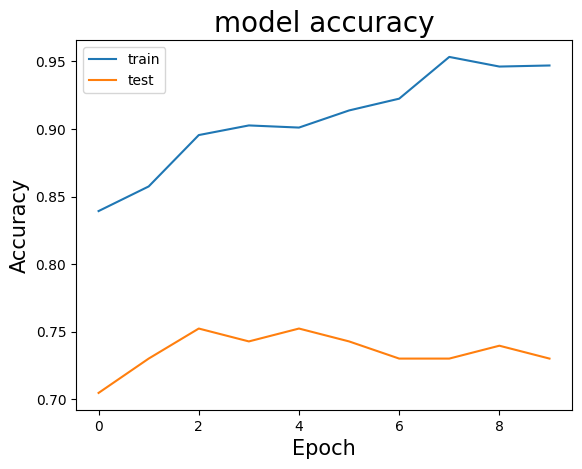

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy',fontsize=20)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.legend(['train','test'],loc='upper left')
plt.show()

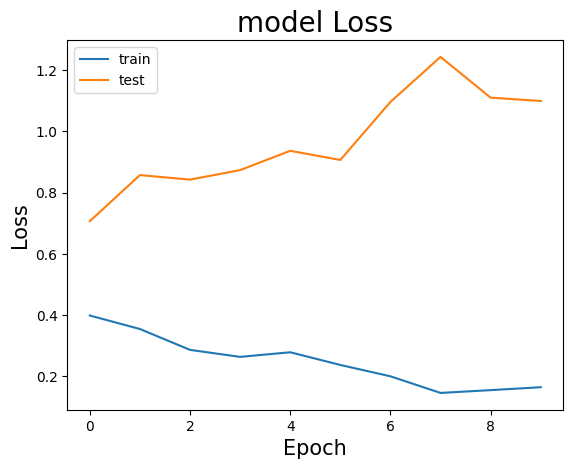

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss',fontsize=20)
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.legend(['train','test'],loc='upper left')
plt.show()

#Conclusion
With the help of cnn we attain the accuracy of 72.69%